# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

Median_Household_Income_2015.csv -- df_hh_income

In [7]:
#1. Shape of the dataframe
df_hh_income.shape

(29322, 3)

In [8]:
#2. How many rows and columns do they have
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [9]:
#3. What are their column names
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [10]:
#4. Are they NaN values or duplicated
#checking for null values
df_hh_income.isna().value_counts()

Geographic Area  City   Median Income
False            False  False            29271
                        True                51
Name: count, dtype: int64

In [11]:
#checking for duplicates
df_hh_income.duplicated().value_counts()

False    29322
Name: count, dtype: int64

Pct_People_Below_Poverty_Level.csv -- df_pct_poverty

In [12]:
#1. Shape of the dataframe
df_pct_poverty.shape

(29329, 3)

In [13]:
#2. How many rows and columns do they have
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [14]:
#3. What are their column names
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [15]:
#4. Are they NaN values or duplicated
#checking for null values
df_pct_poverty.isna().value_counts()

Geographic Area  City   poverty_rate
False            False  False           29329
Name: count, dtype: int64

In [16]:
#checking for duplicates
df_pct_poverty.duplicated().value_counts()

False    29329
Name: count, dtype: int64

Pct_Over_25_Completed_High_School.csv -- df_pct_completed_hs

In [17]:
#1. Shape of the dataframe
df_pct_completed_hs.shape

(29329, 3)

In [18]:
#2. How many rows and columns do they have
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [19]:
#3. What are their column names
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [20]:
#4. Are they NaN values or duplicated
#checking for null values
df_pct_completed_hs.isna().value_counts()

Geographic Area  City   percent_completed_hs
False            False  False                   29329
Name: count, dtype: int64

In [21]:
#checking for duplicates
df_pct_completed_hs.duplicated().value_counts()

False    29329
Name: count, dtype: int64

Share_of_Race_By_City.csv -- df_share_race_city

In [22]:
#1. Shape of the dataframe
df_share_race_city.shape

(29268, 7)

In [23]:
#2. How many rows and columns do they have
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [24]:
#3. What are their column names
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [25]:
#4. Are they NaN values or duplicated
#checking for null values
df_share_race_city.isna().value_counts()

Geographic area  City   share_white  share_black  share_native_american  share_asian  share_hispanic
False            False  False        False        False                  False        False             29268
Name: count, dtype: int64

In [26]:
#checking for duplicates
df_share_race_city.duplicated().value_counts()

False    29268
Name: count, dtype: int64

Deaths_by_Police_US.csv -- df_fatalities

In [27]:
#1. Shape of the dataframe
df_fatalities.shape

(2535, 14)

In [28]:
#2. How many rows and columns do they have
df_fatalities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [29]:
#3. What are their column names
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [30]:
#4. Are they NaN values or duplicated
#checking for null values
df_fatalities.isna().value_counts()

id     name   date   manner_of_death  armed  age    gender  race   city   state  signs_of_mental_illness  threat_level  flee   body_camera
False  False  False  False            False  False  False   False  False  False  False                    False         False  False          2254
                                                            True   False  False  False                    False         False  False           136
                                                            False  False  False  False                    False         True   False            51
                                             True   False   True   False  False  False                    False         False  False            45
                                                            False  False  False  False                    False         False  False            28
                                             False  False   True   False  False  False                    False         True  

In [31]:
#checking for duplicates
df_fatalities.duplicated().value_counts()

False    2535
Name: count, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [32]:
df_fatalities = df_fatalities.fillna(0)

In [33]:
df_fatalities.isna().value_counts()

id     name   date   manner_of_death  armed  age    gender  race   city   state  signs_of_mental_illness  threat_level  flee   body_camera
False  False  False  False            False  False  False   False  False  False  False                    False         False  False          2535
Name: count, dtype: int64

In [34]:
df_hh_income = df_hh_income.fillna(0)

In [35]:
df_hh_income.isna().value_counts()

Geographic Area  City   Median Income
False            False  False            29322
Name: count, dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [36]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [37]:
df_pct_poverty['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [38]:
df_pct_poverty[df_pct_poverty['poverty_rate'] == '-']

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [39]:
df_pct_poverty['poverty_rate'].replace('-', 0, inplace=True)

C:\Users\PT WORLD\AppData\Local\Temp\ipykernel_5572\2803601948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pct_poverty['poverty_rate'].replace('-', 0, inplace=True)


In [40]:
df_pct_poverty[df_pct_poverty['poverty_rate'] == '-']

,Geographic Area,City,poverty_rate


In [41]:
df_pct_poverty[df_pct_poverty['poverty_rate'] == 0]

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,0
608,AK,Attu Station CDP,0
632,AK,Chicken CDP,0
637,AK,Chisana CDP,0
662,AK,Dot Lake CDP,0
...,...,...,...
29261,WY,Oakley CDP,0
29266,WY,Owl Creek CDP,0
29273,WY,Powder River CDP,0
29289,WY,Ryan Park CDP,0


In [42]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [43]:
def convert_to_int(data):   
    data = float(data)
    return data

df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(convert_to_int)


In [44]:
type(df_pct_poverty['poverty_rate'][0])

numpy.float64

In [45]:
poverty_bar = df_pct_poverty.groupby('Geographic Area').mean(numeric_only=True)

In [46]:
df_pct_poverty['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [47]:
poverty_bar = poverty_bar.reset_index()
poverty_bar.rename(columns={'index': 'Geographic Area'}, inplace=True)

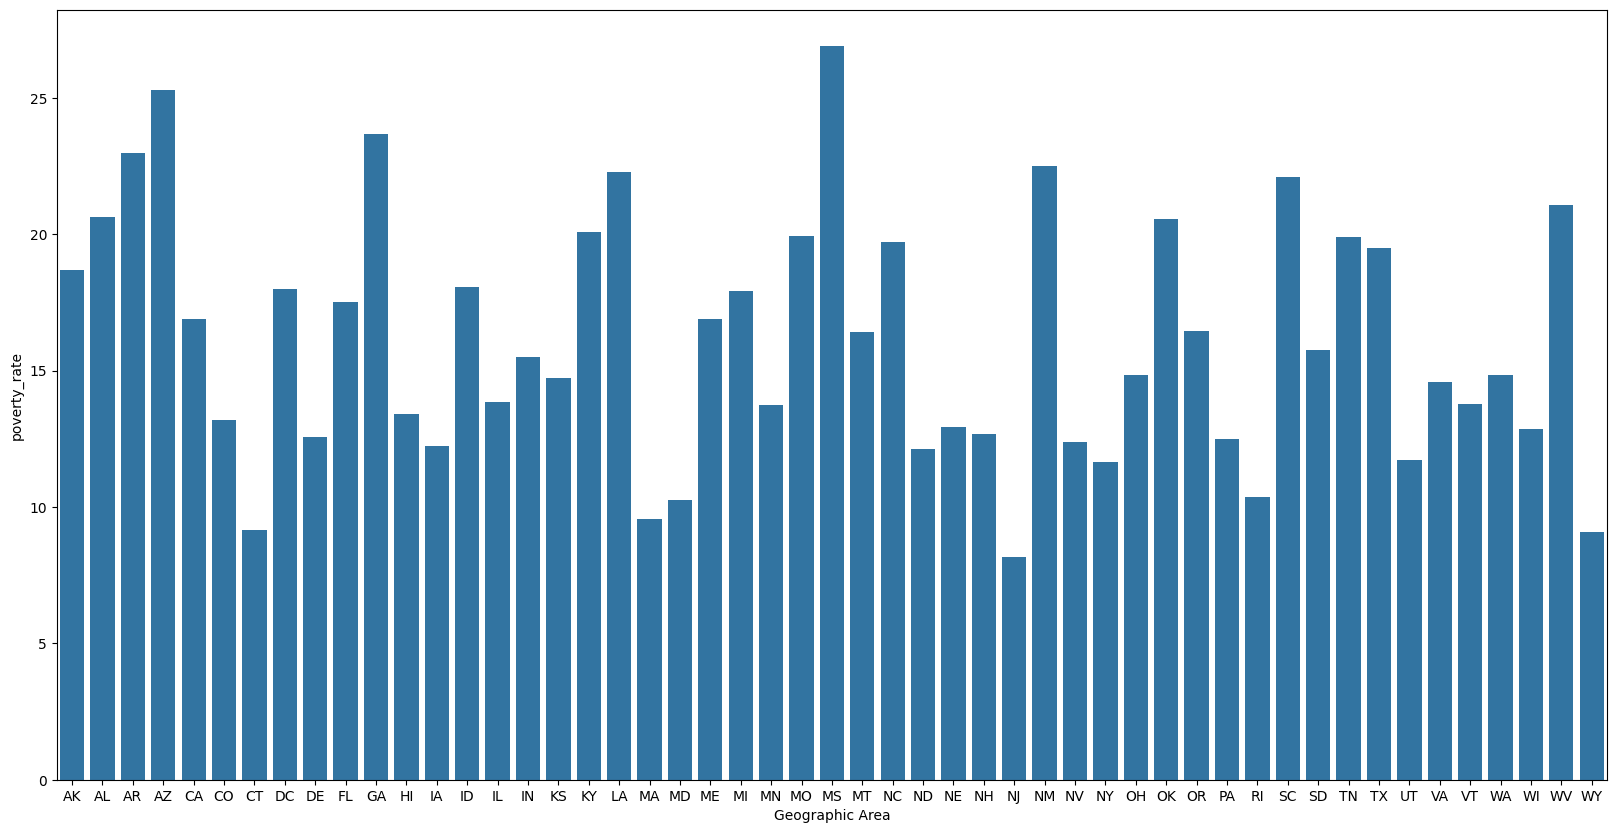

In [48]:
plt.figure(figsize=(20, 10))
sns.barplot(data=poverty_bar, y=poverty_bar['poverty_rate'], x=poverty_bar['Geographic Area'])
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [49]:
completed_high_school = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")

In [50]:
completed_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [51]:
completed_high_school['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [52]:
completed_high_school[completed_high_school['percent_completed_hs'] == '-']

,Geographic Area,City,percent_completed_hs
573,AL,Whatley CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
667,AK,Edna Bay city,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [53]:
completed_high_school['percent_completed_hs'].replace('-', 0, inplace=True)

C:\Users\PT WORLD\AppData\Local\Temp\ipykernel_5572\1938604213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  completed_high_school['percent_completed_hs'].replace('-', 0, inplace=True)


In [54]:
completed_high_school[completed_high_school['percent_completed_hs'] == '-']

,Geographic Area,City,percent_completed_hs


In [55]:
completed_high_school['percent_completed_hs'] = completed_high_school['percent_completed_hs'].apply(convert_to_int)

In [56]:
completed_high_school['percent_completed_hs'][0]

np.float64(21.2)

In [57]:
completed_high_school['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [58]:
df_comp_hs = completed_high_school.groupby('Geographic Area').mean(numeric_only=True)

In [59]:
df_comp_hs = df_comp_hs.reset_index()

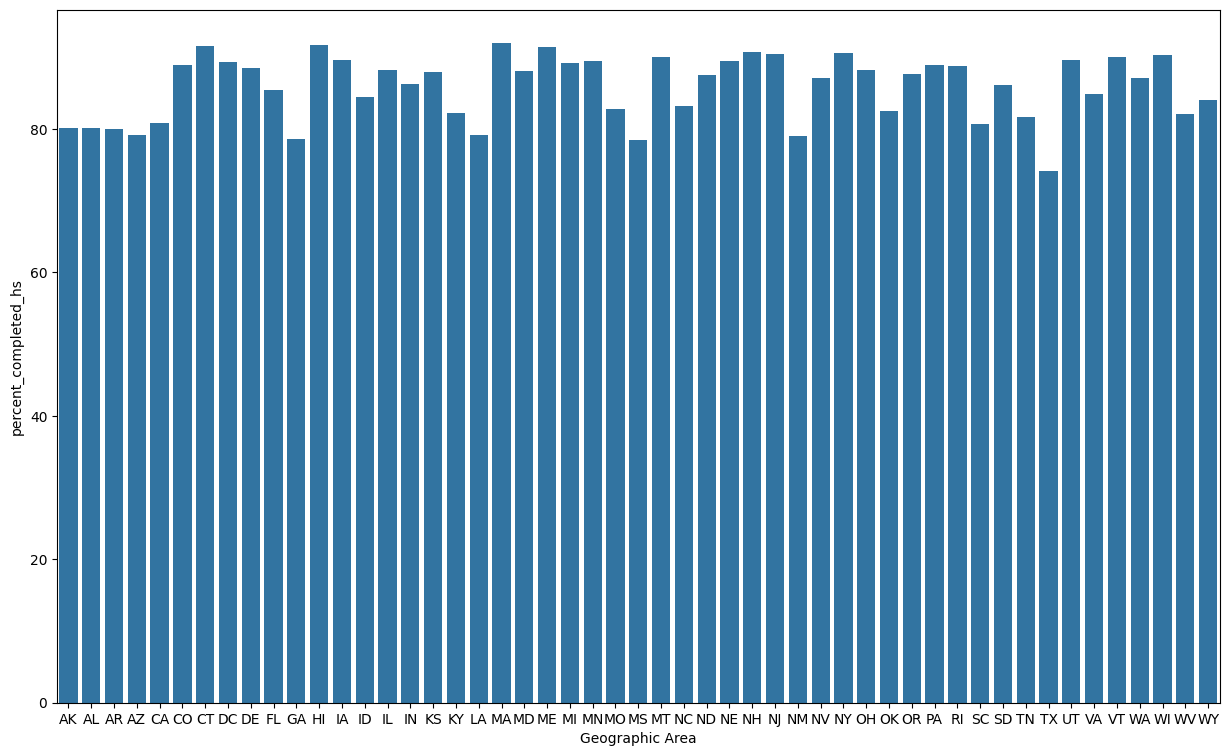

In [60]:
plt.figure(figsize=(15, 9))
sns.barplot(data=df_comp_hs, x=df_comp_hs['Geographic Area'], y=df_comp_hs['percent_completed_hs'])
plt.show()

In [61]:
df_comp_hs.iloc[df_comp_hs['percent_completed_hs'].idxmax()]

Geographic Area           MA
percent_completed_hs   92.03
Name: 19, dtype: object

In [62]:
df_comp_hs.iloc[df_comp_hs['percent_completed_hs'].idxmin()]

Geographic Area           TX
percent_completed_hs   74.09
Name: 43, dtype: object

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [63]:
poverty_rate = df_pct_poverty.groupby('Geographic Area').mean(numeric_only=True)

In [64]:
poverty_rate.reset_index()

,Geographic Area,poverty_rate
0,AK,18.68
1,AL,20.61
2,AR,22.96
3,AZ,25.27
4,CA,16.89
5,CO,13.19
6,CT,9.14
7,DC,18.00
8,DE,12.56
9,FL,17.51


In [65]:
poverty_rate['poverty_rate']

Geographic Area
AK   18.68
AL   20.61
AR   22.96
AZ   25.27
CA   16.89
CO   13.19
CT    9.14
DC   18.00
DE   12.56
FL   17.51
GA   23.66
HI   13.40
IA   12.23
ID   18.08
IL   13.85
IN   15.50
KS   14.72
KY   20.08
LA   22.29
MA    9.55
MD   10.27
ME   16.89
MI   17.90
MN   13.75
MO   19.93
MS   26.88
MT   16.42
NC   19.72
ND   12.13
NE   12.92
NH   12.66
NJ    8.16
NM   22.51
NV   12.37
NY   11.64
OH   14.83
OK   20.55
OR   16.44
PA   12.49
RI   10.37
SC   22.11
SD   15.75
TN   19.89
TX   19.50
UT   11.72
VA   14.59
VT   13.79
WA   14.83
WI   12.86
WV   21.08
WY    9.06
Name: poverty_rate, dtype: float64

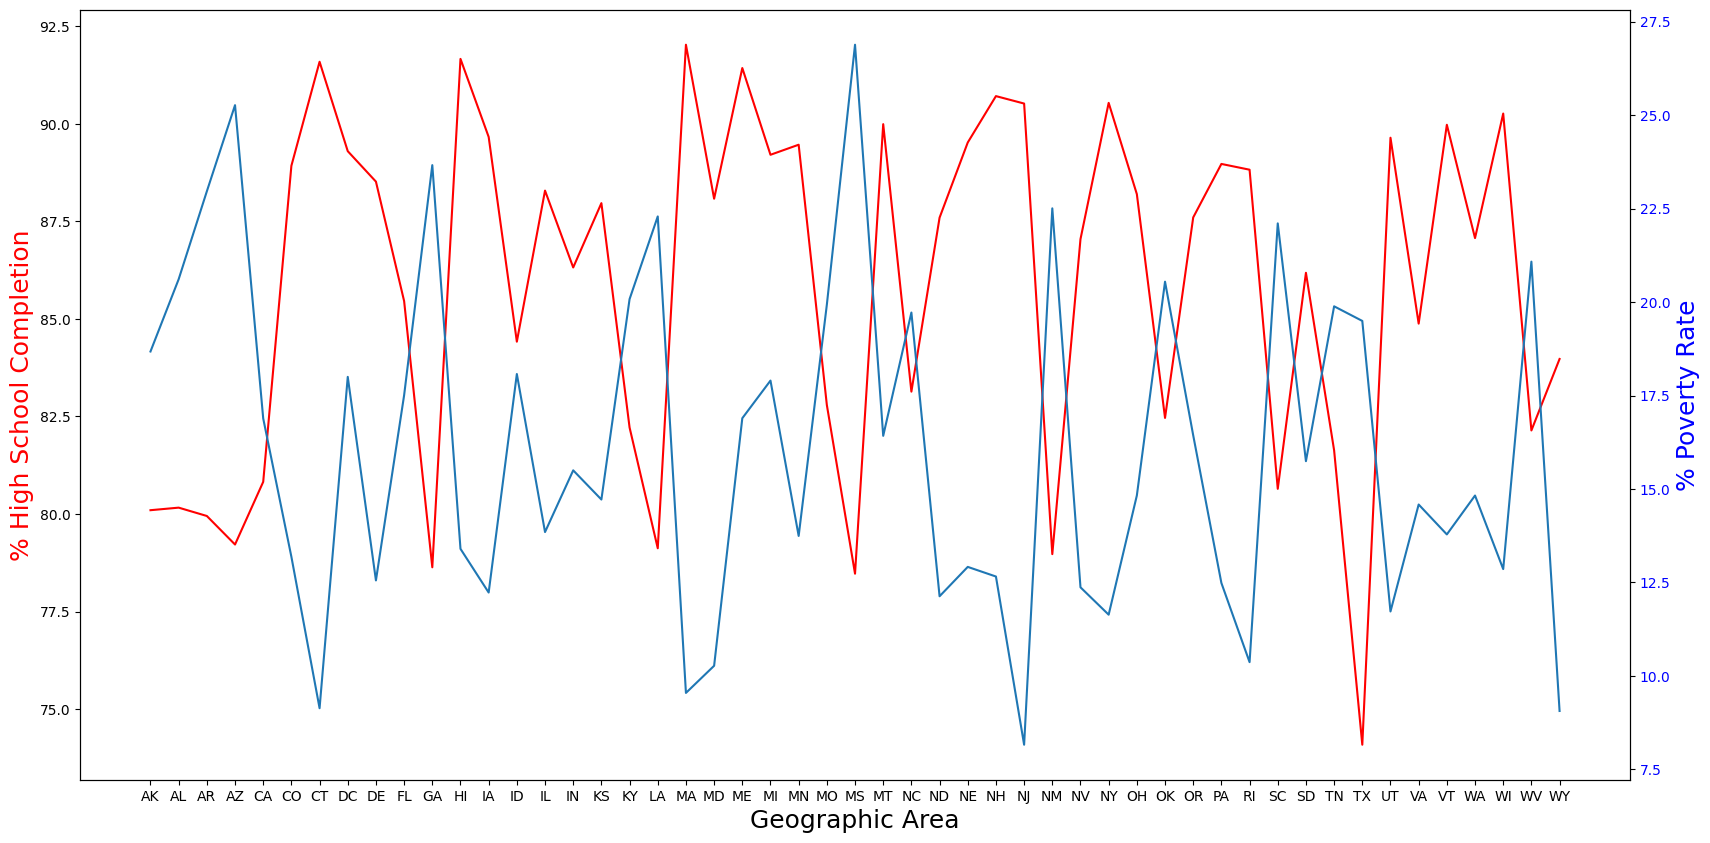

In [66]:


fig, ax= plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()

ax.plot(df_comp_hs['Geographic Area'], df_comp_hs['percent_completed_hs'], color='red')
ax.set_ylabel('% High School Completion', fontsize=18, color="red")
for label in ax.get_yticklabels():
    label.set_color("red")

ax2.plot(df_comp_hs['Geographic Area'], poverty_rate['poverty_rate'])
ax2.set_ylabel('% Poverty Rate', fontsize=18, color="blue")
for label in ax2.get_yticklabels():
    label.set_color("blue")


ax.set_xlabel('Geographic Area', fontsize=18, color="black")
for label in ax.get_yticklabels():
    label.set_color("black")

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [67]:
len(poverty_rate['poverty_rate'])

51

In [68]:
poverty_rate = poverty_rate.reset_index()

In [69]:
len(df_comp_hs['percent_completed_hs'])

51

In [70]:
merged_df = pd.concat([poverty_rate['poverty_rate'], df_comp_hs['percent_completed_hs']], axis=1)

In [71]:
merged_df.head()

,poverty_rate,percent_completed_hs
0,18.68,80.10
1,20.61,80.16
2,22.96,79.95
3,25.27,79.22
4,16.89,80.82


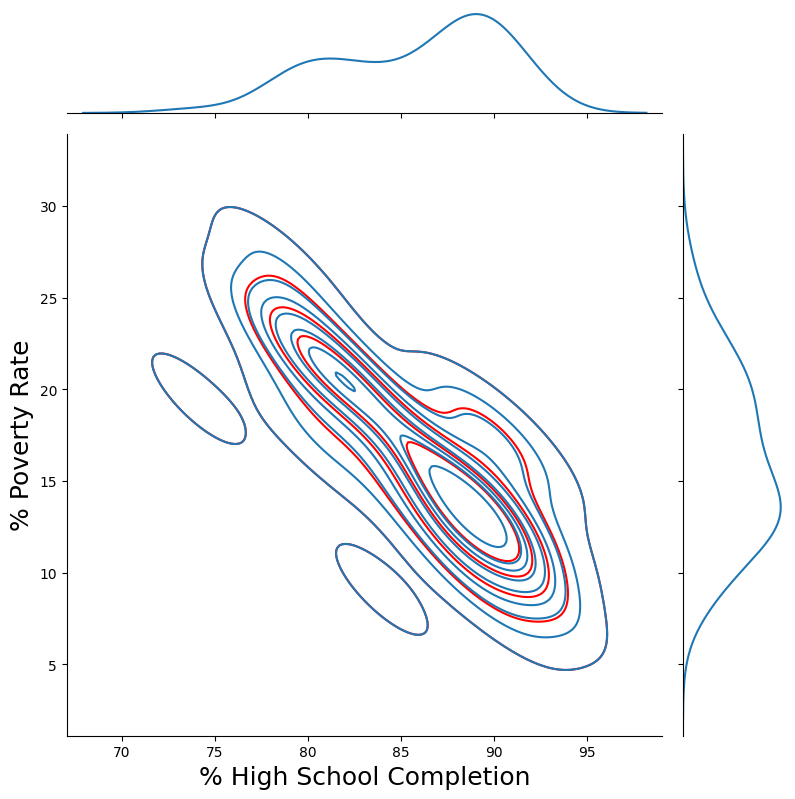

In [72]:


g = sns.jointplot(data = merged_df, x='percent_completed_hs', y='poverty_rate', kind='kde', height=8)
g.plot_joint(sns.kdeplot, color='r', zorder=0, levels=6)
g.set_axis_labels('% High School Completion', '% Poverty Rate', fontsize=18)
plt.show()





#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

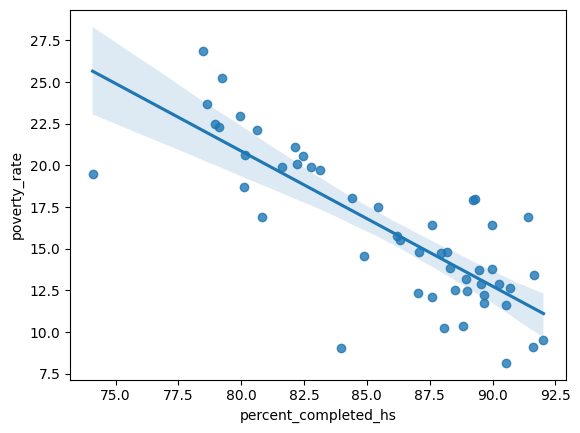

In [73]:
sns.regplot(data=merged_df, x='percent_completed_hs', y='poverty_rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [120]:
df_racial = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'City':pd.Series.count, 'share_hispanic':pd.Series.count, 'share_asian': pd.Series.count, 'share_native_american':pd.Series.count, 'share_white':pd.Series.count, 'share_black':pd.Series.count})
col_subset = ['share_hispanic', 'share_asian', 'share_native_american', 'share_white', 'share_black']
# df_racial.sort_values(col_subset, ascending=False, inplace=True)
 
 
plt.figure(figsize=(16, 8), dpi=120)
fig = px.bar(df_racial, x='Geographic area', 
             y=['share_hispanic', 'share_asian', 'share_native_american', 'share_white', 'share_black'], 
             
             hover_name = df_racial['Geographic area'],
             title="Bar Chart with Subsections Showing the Racial Makeup of Each US State")
fig.update_layout(xaxis_title="Geographic area", yaxis_title="Racial Makeup")
fig.show()

<Figure size 1920x960 with 0 Axes>

In [78]:
def clean_and_convert(value):
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
            value = value.replace('(', '-')  
            value = value.replace(')', '')  
            value = float(value)  
        return value
    except ValueError:
        return np.nan  

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [85]:
#df_fatalities = df_fatalities.dropna()

In [86]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [87]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [88]:
df_fatalities['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 0, 'N'], dtype=object)

In [89]:
deaths = df_fatalities['race'].value_counts()


In [90]:
fig = px.pie(labels=deaths.index,values=deaths.values,title="People Killed by Race",names=deaths.index,hole=0.6,)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [91]:
gender_deaths = df_fatalities['gender'].value_counts()

In [92]:
fig = px.pie(labels=gender_deaths.index, values=gender_deaths.values, title="Deaths By Gender", names=gender_deaths.index,)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [93]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [94]:
df_fatalities['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

C:\Users\PT WORLD\AppData\Local\Temp\ipykernel_5572\1805945440.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



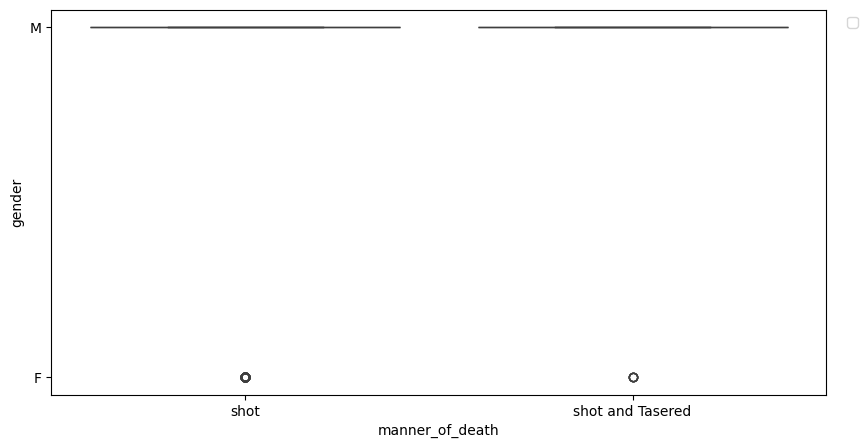

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_fatalities,  y='gender', x='manner_of_death')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [96]:
df_fatalities['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and

In [97]:
armed_deaths = df_fatalities['armed'].value_counts()
armed_deaths

armed
gun                        1398
knife                       373
vehicle                     177
unarmed                     171
undetermined                117
                           ... 
air conditioner               1
pole and knife                1
baseball bat and bottle       1
fireworks                     1
pen                           1
Name: count, Length: 69, dtype: int64

In [98]:
fig = px.pie(labels=armed_deaths.index, values=armed_deaths.values, title="Percentage of Killings when armed", names=armed_deaths.index,)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [99]:
len(df_fatalities)

2535

In [100]:
len(df_fatalities[df_fatalities['age'] < 25])/len(df_fatalities) * 100

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

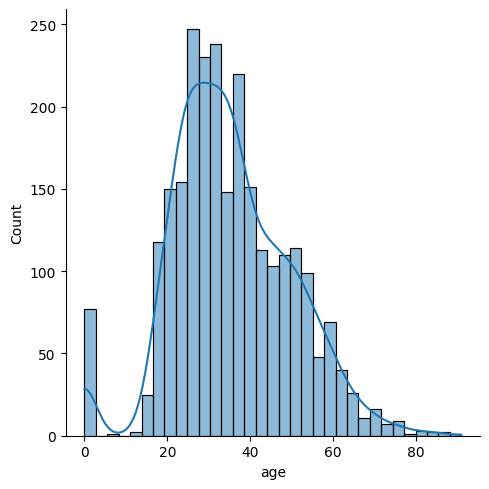

In [101]:
sns.displot(data=df_fatalities, x=df_fatalities['age'], kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 


In [140]:
df_fatalities['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 0, 'N'], dtype=object)

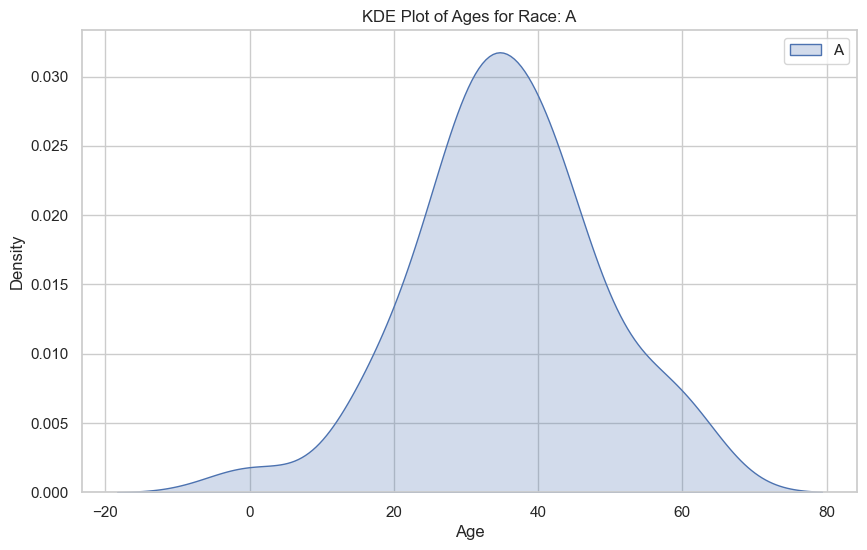

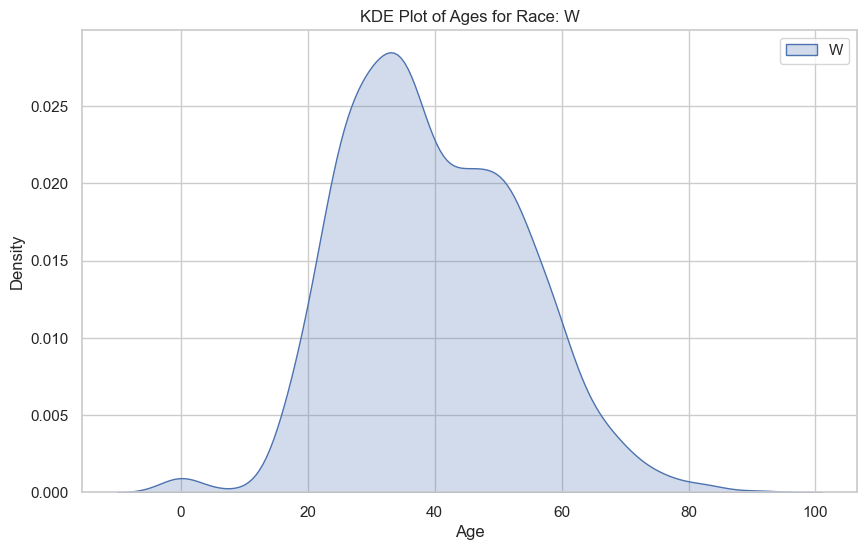

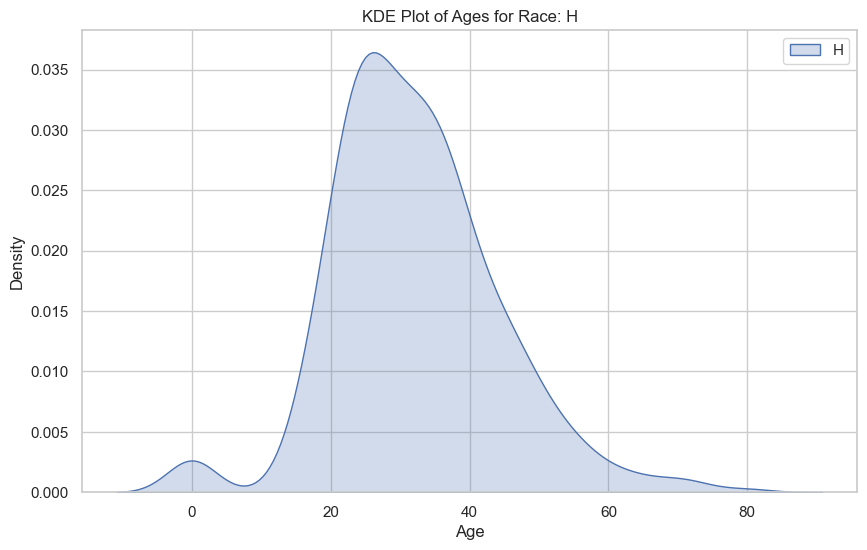

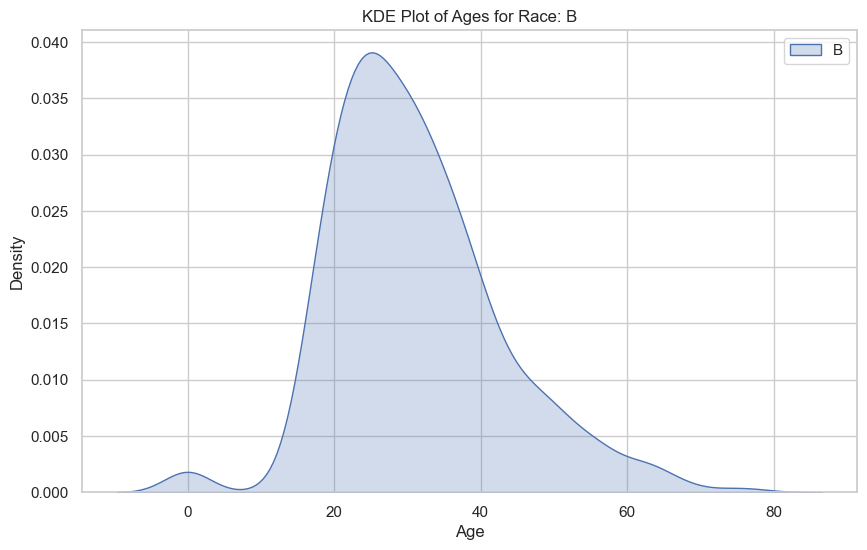

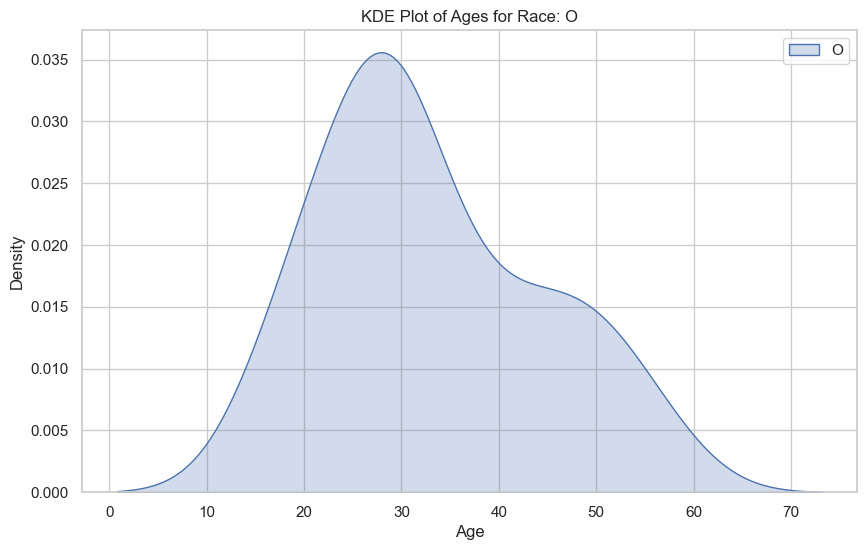

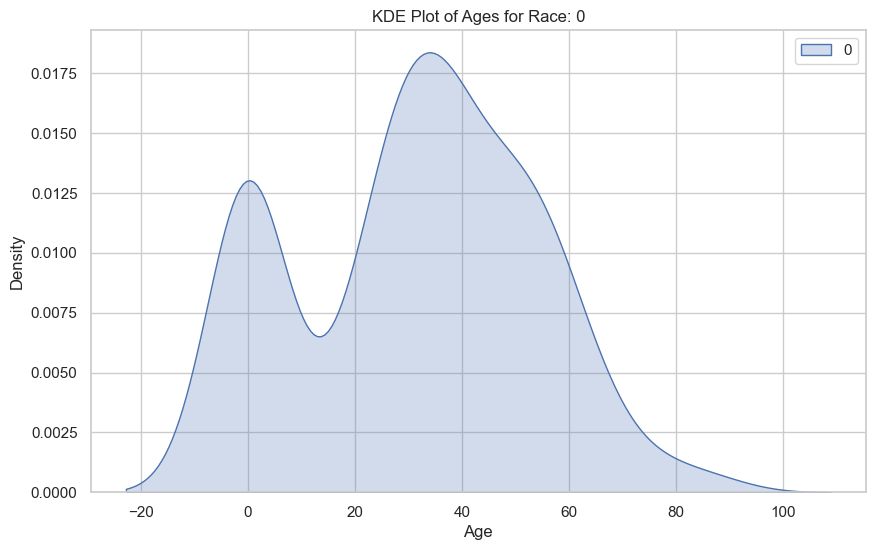

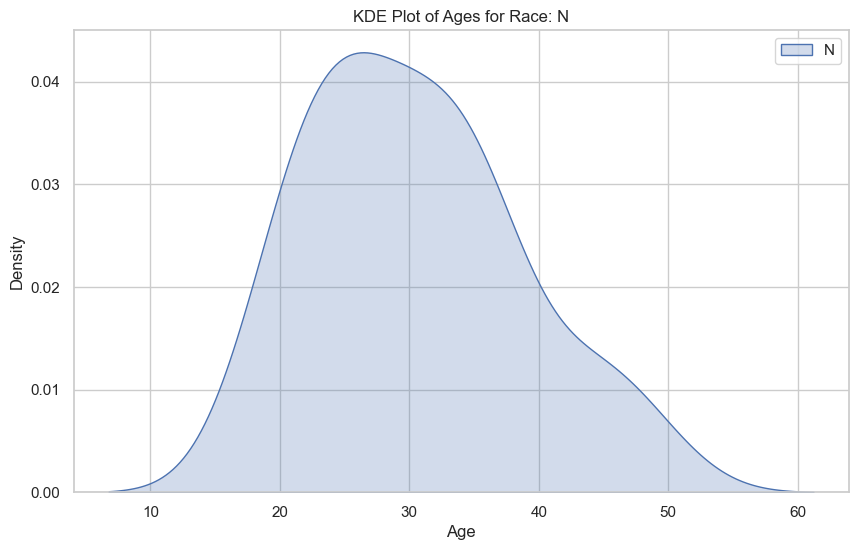

In [139]:
sns.set(style="whitegrid")

# List of unique races
races = df_fatalities['race'].unique()

# Create a KDE plot for each race
for race in races:
    plt.figure(figsize=(10, 6))
    subset = df_fatalities[df_fatalities['race'] == race]
    sns.kdeplot(subset['age'], fill=True, label=race)
    plt.title(f'KDE Plot of Ages for Race: {race}')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [134]:
race_deaths = df_fatalities['race'].value_counts()
race_deaths = pd.DataFrame(race_deaths)
race_deaths = race_deaths.reset_index()
race_deaths

,race,count
0,W,1201
1,B,618
2,H,423
3,0,195
4,A,39
5,N,31
6,O,28


In [137]:
px.bar(data_frame=race_deaths, x='race', y='count', color='count')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [102]:
len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True])/len(df_fatalities) * 100

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [103]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [104]:
deaths_city = df_fatalities['city'].value_counts()

In [113]:
len(df_fatalities['state'].value_counts())

51

In [105]:
city_deaths = pd.DataFrame(deaths_city)

In [106]:
city_deaths = city_deaths.reset_index()

In [107]:
city_deaths

,city,count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
...,...,...
1412,Mamou,1
1413,Lacey,1
1414,Crescent City,1
1415,Newton Grove,1


In [108]:
top10_deaths = city_deaths.nlargest(10, columns='count')

In [109]:
fig = px.bar(data_frame=top10_deaths, x='city', y='count', color='count')
fig.update_layout(xaxis_title='City',yaxis_title='Number of Deaths',coloraxis_showscale=False)
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

Rate of killing for a racial group = (Number of people killed from that racial group) / (Population share of that racial group in the city)

In [110]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [129]:
state_counts = df_fatalities['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

state_counts

,state,count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [130]:
fig = px.choropleth(state_counts,
                    locations='state',
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale='Reds',
                    scope="usa",
                    labels={'count':'Number of Shootings'},
                    title='Police-Involved Shootings by State')

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

C:\Users\PT WORLD\AppData\Local\Temp\ipykernel_5572\3187905031.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



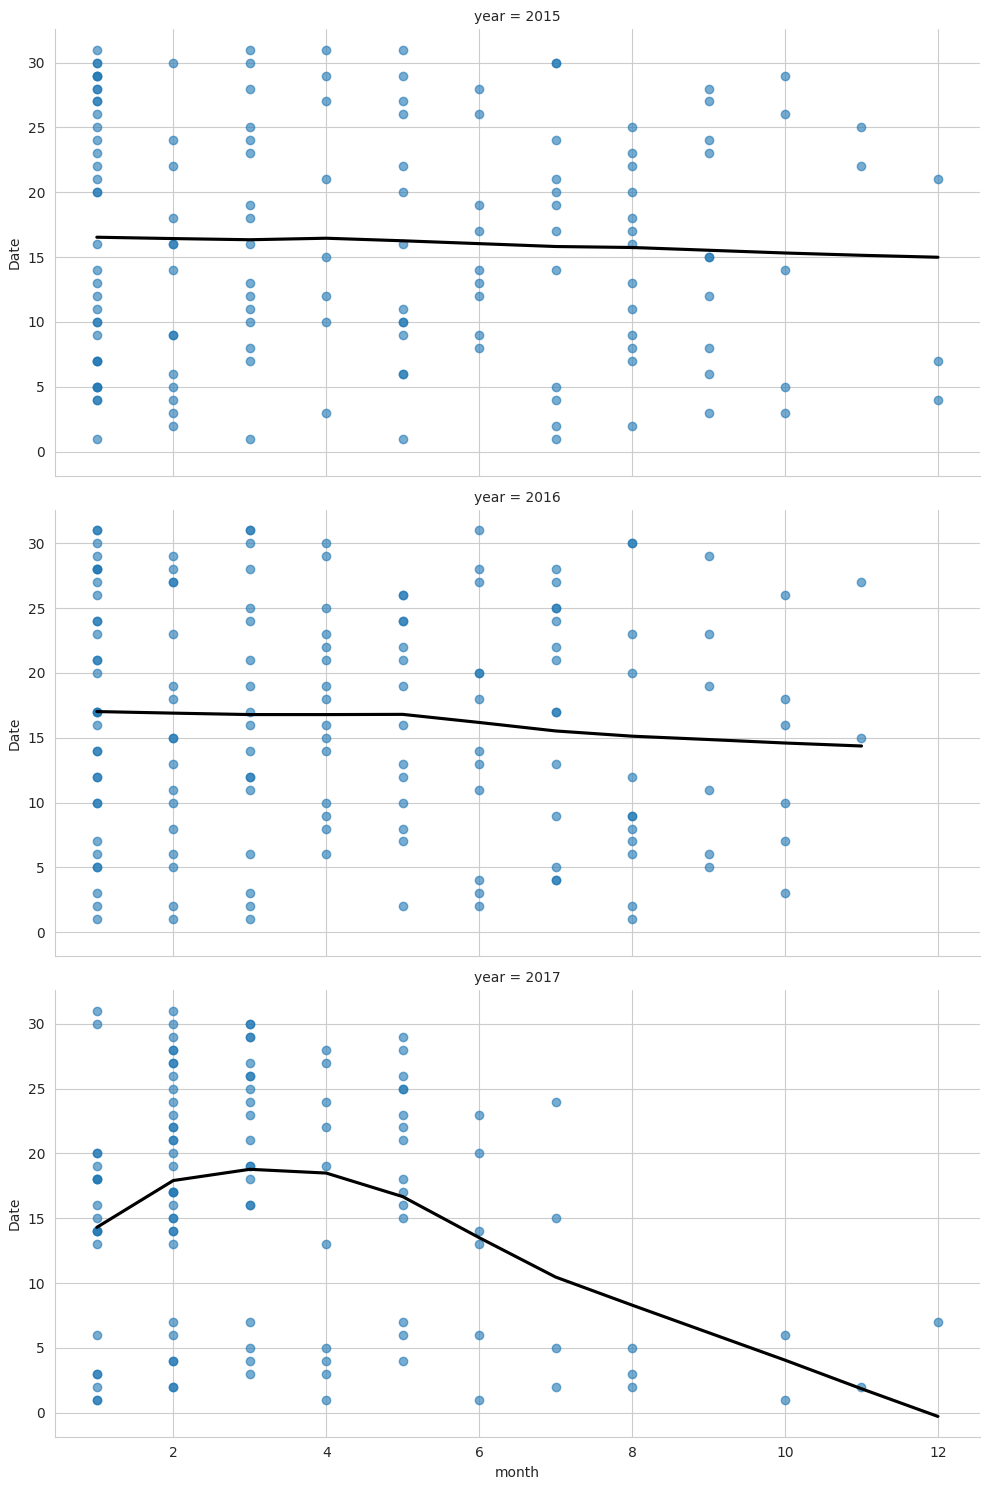

In [121]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
 
killings_over_time = df_fatalities.groupby(['date', 'race'], as_index=False).state.count()
killings_over_time['year'] = killings_over_time['date'].dt.year
killings_over_time['month'] = killings_over_time['date'].dt.month
killings_over_time['Date'] = killings_over_time['date'].dt.day
 
killings_over_time = killings_over_time.groupby(['year', 'Date', 'race'], as_index=False).month.count()
killings_over_time.sort_values('Date', ascending=False)
 
# plotting graph
with sns.axes_style("whitegrid"):
    sns.lmplot(data=killings_over_time,
              x='month',
              y='Date',
              row='year',
              lowess=True,
              aspect=2,
              scatter_kws={'alpha':0.6},
              line_kws={'color':'black'}
              )

Yes, there is a trend in the data, the police killings reduced over time.

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).